In [1]:
import numpy as np

# Generating linearly separable data

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10, n_informative=1, n_redundant=0)

In [3]:
print(X.shape)
print(y.shape)
# print(y)      


(100, 2)
(100,)


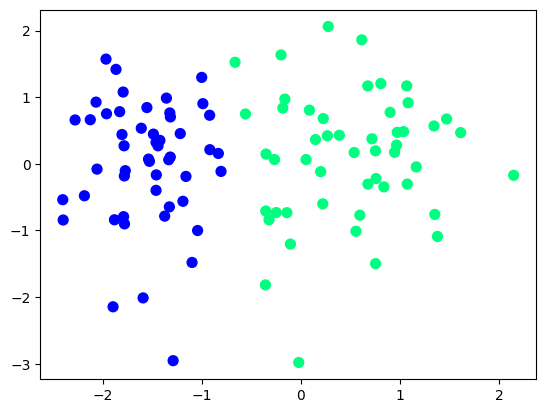

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y, cmap='winter', s=50)

# Making a function

In [5]:
def step(val):
  return 1 if val>0 else 0

In [6]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  epochs = 1000

  for i in range(epochs):
    j = np.random.randint(0,X.shape[0])
    y_hat = step(np.dot(X[j], weights))
    weights = weights + lr * (y[j] - y_hat) * X[j]
  return weights

In [7]:
weights = perceptron(X,y)
weights

array([1.        , 1.33137518, 0.02253767])

In [8]:
C = weights[0]
A = weights[1]
B = weights[2]

# Ax + By + C = 0
# y = -A/B x -C/B
# m = -A/B
# b = -C/B

In [9]:
m = -(A / B)
b = -(C / B)

# Plotting Decision Boundary

In [10]:
# using 100 random numbers(datapoints) for plotting
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b           

(-3.0, 3.0)

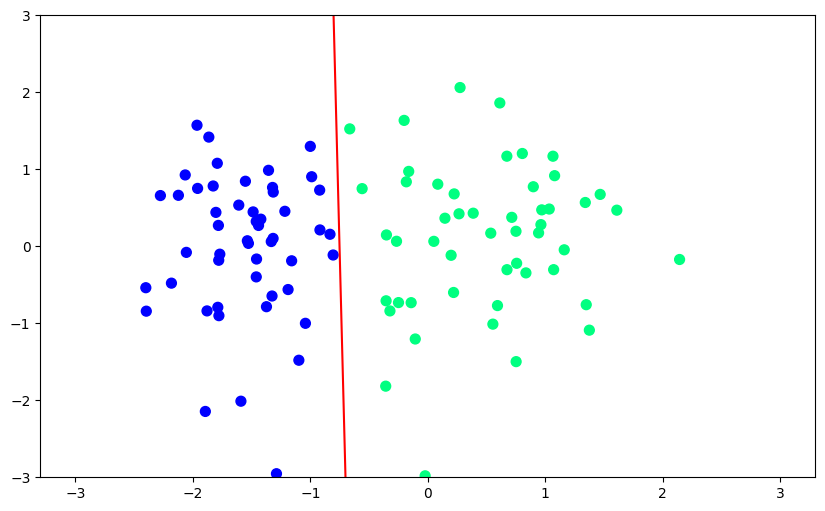

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap ='winter',s=50)
plt.plot(x_input,y_input,color='red')
plt.ylim(-3,3)

# Animating Decision Boundary

In [12]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [13]:
m,b = perceptron(X,y)

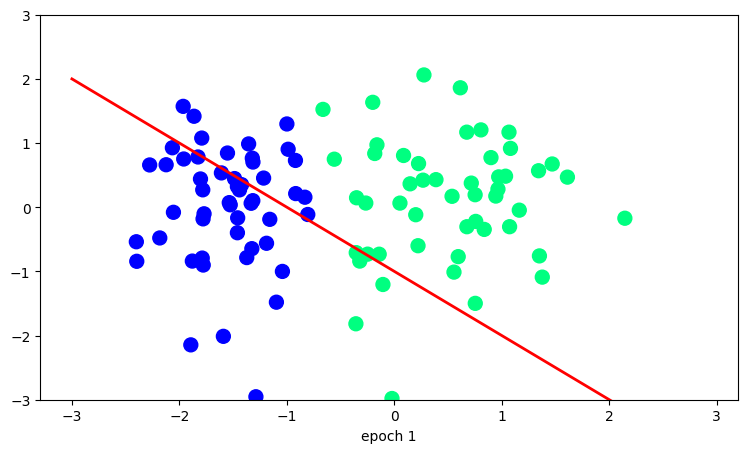

In [14]:
# %matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

# Logistic Regression from Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

# Preceptron just made vs Logistic in sklearn

In [16]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

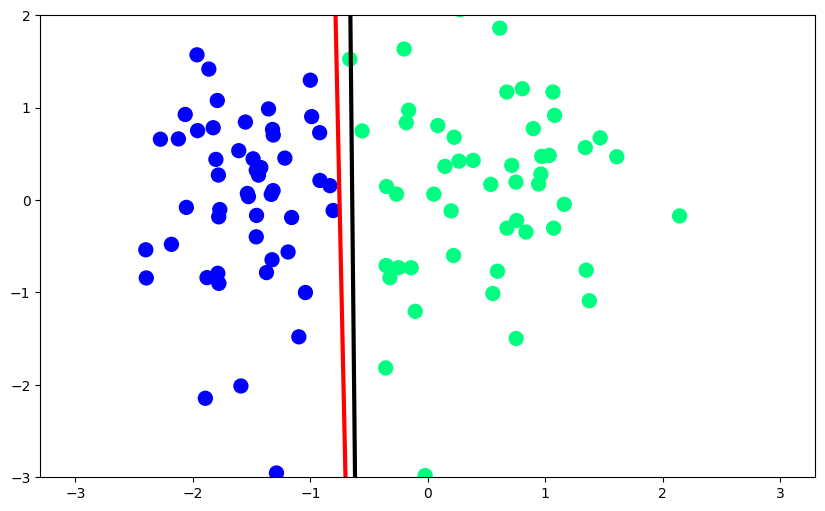

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)